
# Modelo de Regressão linear Múltipla

O notebook abaixo se trata de um modelo preditivo de regressão linear para previsão do consumo de um veículo com base em variaveis de correlacionadas ao consumo.


OBS: este modelo é um estudo estátistico e ignora outras causas físicas e matemáticas que podem interferir nos dados


<img src="assets/regressãomult.png">

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Warning 
from yellowbrick.regressor import ResidualsPlot 

In [2]:
# Carregamento da base de dados e exclusão da primeiro coluna
base = pd.read_csv('mt_cars.csv')
base.shape

(32, 12)

In [3]:
#mpeg milhas por galão, cyl clindros, disp cilindradas, hp
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
#exclui coluna
base = base.drop(['Unnamed: 0'], axis = 1)
base.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
# Criação de X e Y: variável independente e variável dependente
# Cálculo da correlação entre X e Y
X = base.iloc[:, 2].values #coluna disp
y = base.iloc[:, 0].values #coluna mpg
correlacao = np.corrcoef(X, y)
correlacao

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [6]:
# Mudança do formato de X para o formato de matriz (necessário para versões mais recentes do sklearn)
X = X.reshape(-1, 1)

In [7]:
# Criação do modelo, treinamento, visualização dos coeficientes e do score do modelo
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [8]:
#Interceptação
modelo.intercept_

29.59985475616395

In [9]:
#inclinação
modelo.coef_

array([-0.04121512])

In [10]:
#score R^2
modelo.score(X, y)

0.7183433404897299

In [11]:
# Geração das previsões
previsoes = modelo.predict(X)
previsoes

array([23.00543556, 23.00543556, 25.1486218 , 18.96635381, 14.76241157,
       20.32645276, 14.76241157, 23.55359666, 23.79676587, 22.69220065,
       22.69220065, 18.23272467, 18.23272467, 18.23272467, 10.14631813,
       10.64089957, 11.46520197, 26.35622482, 26.47987017, 26.66945973,
       24.64991885, 16.49344661, 17.07045829, 15.17456277, 13.11380677,
       26.34386028, 24.64167582, 25.68029685, 15.13334765, 23.62366236,
       17.19410365, 24.61282524])

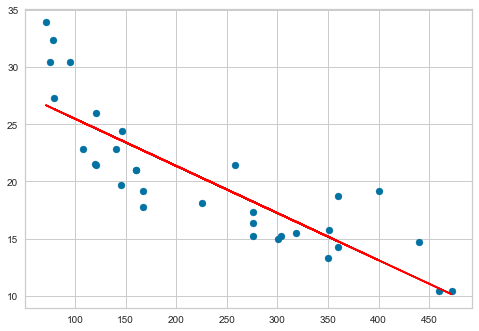

In [12]:
# Visualização dos resultados
plt.scatter(X, y)
plt.plot(X, previsoes, color = 'red')

In [13]:
# Previsão para somente um valor
modelo.predict([[200]])

array([21.35683076])

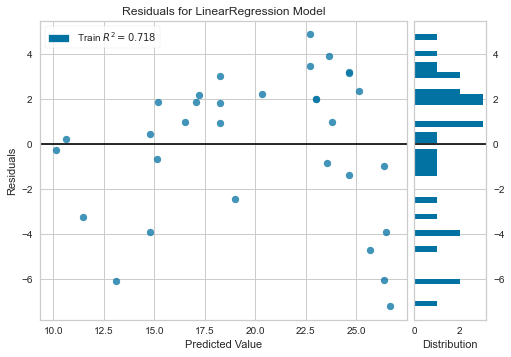

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [14]:
#residuos do modelo de 2 dimensões
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()

In [15]:
# Criação de novas variáveis X1 e Y1 e novo modelo para comparação com o anterior
# 3 variáveis dependentes para prever mpg: cyl	disp	hp
X1 = base.iloc[:, 1:4].values
X1

array([[  6. , 160. , 110. ],
       [  6. , 160. , 110. ],
       [  4. , 108. ,  93. ],
       [  6. , 258. , 110. ],
       [  8. , 360. , 175. ],
       [  6. , 225. , 105. ],
       [  8. , 360. , 245. ],
       [  4. , 146.7,  62. ],
       [  4. , 140.8,  95. ],
       [  6. , 167.6, 123. ],
       [  6. , 167.6, 123. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 472. , 205. ],
       [  8. , 460. , 215. ],
       [  8. , 440. , 230. ],
       [  4. ,  78.7,  66. ],
       [  4. ,  75.7,  52. ],
       [  4. ,  71.1,  65. ],
       [  4. , 120.1,  97. ],
       [  8. , 318. , 150. ],
       [  8. , 304. , 150. ],
       [  8. , 350. , 245. ],
       [  8. , 400. , 175. ],
       [  4. ,  79. ,  66. ],
       [  4. , 120.3,  91. ],
       [  4. ,  95.1, 113. ],
       [  8. , 351. , 264. ],
       [  6. , 145. , 175. ],
       [  8. , 301. , 335. ],
       [  4. , 121. , 109. ]])

In [16]:
y1 = base.iloc[:, 0].values
modelo2 = LinearRegression()
modelo2.fit(X1, y1)
#R^2
modelo2.score(X1, y1)

0.7678877440928639

In [17]:
# Previsão de um novo registro
novo = np.array([4, 200, 100])
novo = novo.reshape(1, -1)
modelo2.predict(novo)

array([24.03968887])

 impossivel de se visualizar graficamente os residuos do modelo pois se trata de um modelo de 4 dimensões